In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

1. Loading in our data as x_train, x_test, y_train, y_test

Note: we would also want to view our data as np array so we have more functionality

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 46s 0us/step


In [33]:
cifar_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [12]:
x_train = np.array(x_train)
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test = np.array(x_test)
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_train = np.array(y_train)
y_train.shape

(50000, 1)

In [70]:
# data is fully balanced
elements, counts = np.unique(y_train, return_counts=True)
print(elements)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [15]:
y_test = np.array(y_test)
y_test.shape

(10000, 1)

2. Understanding the images

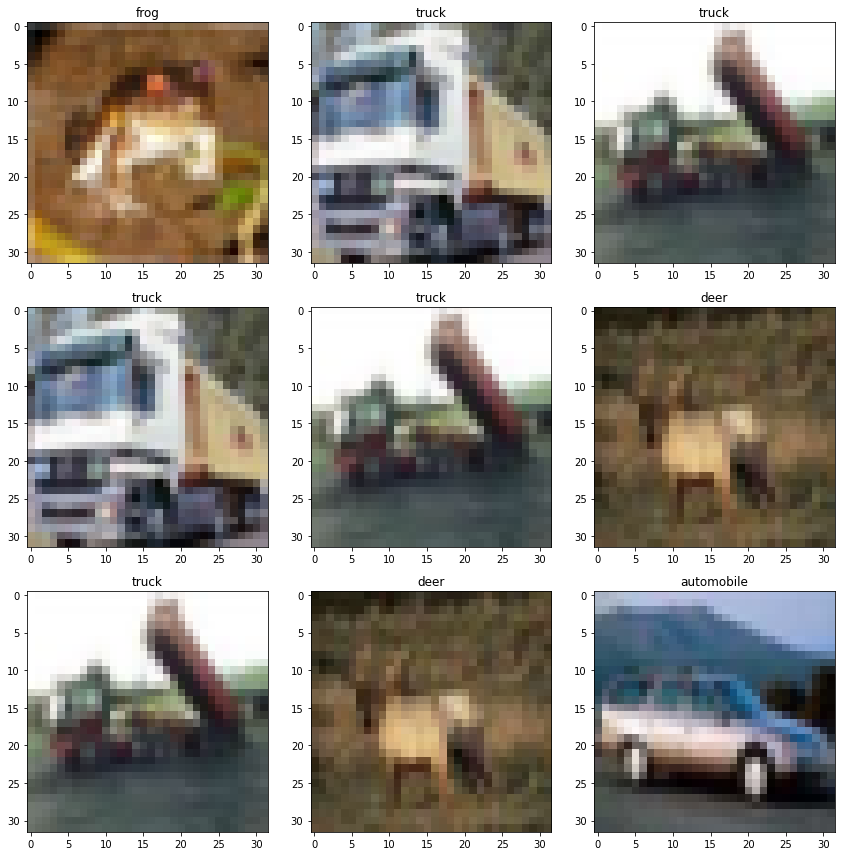

In [148]:
f, axarr = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(x_train[i+j])
        axarr[i,j].title.set_text(cifar_dict[y_train[i+j][0]])
f.tight_layout()
plt.savefig("images/train_images.png")

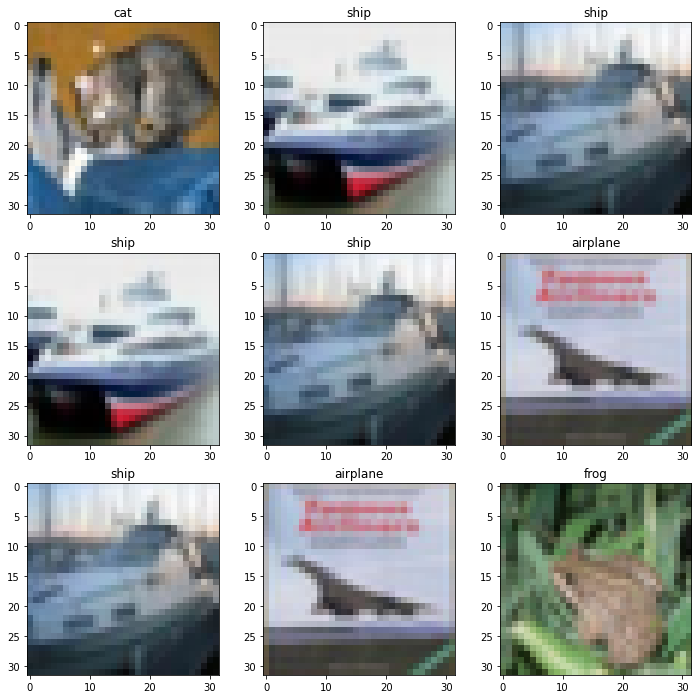

In [138]:
f, axarr = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(x_test[i+j])
        axarr[i,j].set_title(cifar_dict[y_test[i+j][0]])
plt.savefig("images/test_images.png")

3. Creating a convolutional model

In [120]:
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, BatchNormalization, Input, Conv2D, Flatten
from tensorflow.keras.models import Model

def cifar_conv_model():
    inp =  Input((32, 32, 3))
    x = BatchNormalization()(inp)
    
    x = Conv2D(64, kernel_size=3, strides=(1,1), activation='relu', kernel_initializer='glorot_normal')(x)
    x = Conv2D(64, kernel_size=3, strides=(1,1), activation='relu', kernel_initializer='glorot_normal')(x)
    x = MaxPooling2D(pool_size=(3,3))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(256, kernel_size=2, strides=(1,1), activation='relu', kernel_initializer='glorot_normal')(x)
    x = Conv2D(256, kernel_size=2, strides=(1,1), activation='relu', kernel_initializer='glorot_normal')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    out = Dense(10, activation='softmax')(x)
    
    model = Model(inp, out)

    print(model.summary())
    return model

In [121]:
model = cifar_conv_model()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 9, 9, 64)          0  

4. Compiling the Model

In [122]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

optimizer = Adam(learning_rate=0.001)
loss = SparseCategoricalCrossentropy()

In [123]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

5. Fitting the Model

In [124]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=4, 
    verbose=1,
    mode='auto',
    min_delta=0.0001, 
    cooldown=0, 
    min_lr=0.0000001
)
checkpoint = ModelCheckpoint(
    "model/cifar10_main_model.h5", 
    save_best_only=True,
    verbose=1
)

callbacks = [
    lr_reduction,
    checkpoint
]

In [125]:
history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test, y_test),
    epochs=25,
    verbose=1,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/25
782/782 [==============================] - ETA: 0s - loss: 1.4604 - accuracy: 0.4645
Epoch 1: val_loss improved from inf to 1.20609, saving model to model/cifar10_main_model.h5
782/782 [==============================] - 16s 20ms/step - loss: 1.4604 - accuracy: 0.4645 - val_loss: 1.2061 - val_accuracy: 0.5866 - lr: 0.0010
Epoch 2/25
780/782 [============================>.] - ETA: 0s - loss: 1.0115 - accuracy: 0.6429
Epoch 2: val_loss improved from 1.20609 to 0.94007, saving model to model/cifar10_main_model.h5
782/782 [==============================] - 16s 20ms/step - loss: 1.0115 - accuracy: 0.6429 - val_loss: 0.9401 - val_accuracy: 0.6723 - lr: 0.0010
Epoch 3/25
780/782 [============================>.] - ETA: 0s - loss: 0.8412 - accuracy: 0.7071
Epoch 3: val_loss improved from 0.94007 to 0.78459, saving model to model/cifar10_main_model.h5
782/782 [==============================] - 16s 20ms/step - loss: 0.8410 - accuracy: 0.7072 - val_loss: 0.7846 - val_accuracy: 0.7298 - l

In [127]:
history

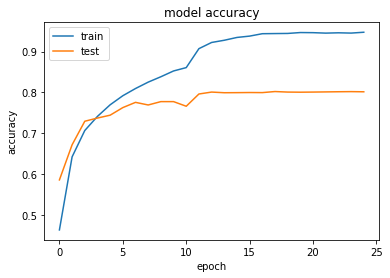

<Figure size 432x288 with 0 Axes>

In [130]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("images/model_acc.png")

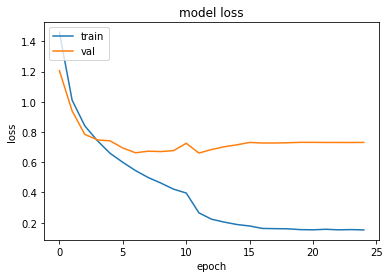

In [153]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.show()
plt.savefig("images/model_loss.png", bbox_inches='tight')